# 🤖 **AI para DEVs - Fase 1** 🤖

## 📈 **Desafio Machine Learning Avançado**

Construir um modelo preditivo com base na base de dados HR_Abandono.csv.

### **Passo 1**
Análise da consistência dos dados. Utilizar a biblioteca do Pandas para subir a base de dados e realizar validações sobre os dados, tais como a veririficação de valores nulos, duplicados, identificação de outliers e realizar tratativas caso necessário. Explicar cada etapa de transformação aplicada aos dados caso seja necessário.

Após realizar a tratativa dos dados, caprichar na estatísitca descritiva. Entender a média das variáveis qualitativas, entre outras.

### **Passo 2**
Utilizar a biblioteca do Matplotlib e Seaborn para realizar a análise de dados com storytelling. Utilizar inferências para explicar as análises.

### **Passo 3**
Após a análise exploratória, formular uma hipótese estatística (aqui é importante definir claramente a afirmação que será testada), com o objetivo de comprovar se a hipótese será aceita ou não. Valide o teste e explique se a hipótese foi aceita.

### **Passo 4**
Identificar quai tipo de problema pode ser resolvido (supervisionado ou não supervisionado). Caso o modelo seja supervisionado, identifique a variável target.

### **Passo 5**
Construir um modelo preditivo com os algoritmos disponíveis na biblioteca do Scikit-Learn e explicar qual algoritmo foi escolhido para solucionar o problema definido. Esclarecer os hiperparametros utilizados.

### **Passo 6**
Validar o modelo com o uso de métricas estatísticas apropriadas para comprovar a eficácia do modelo.

# 1. ANÁLISE EXPLORATÓRIA DOS DADOS (EDA)

In [ ]:
!pip install dtreeviz

In [ ]:
!pip install yellowbrick

In [494]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pydotplus
import dtreeviz
import warnings
import logging
import yellowbrick

# Silencia warnings do Python
warnings.filterwarnings("ignore")

# Silencia logs do Matplotlib
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

print('Bibliotecas importadas e configurações realizadas com sucesso.')

Bibliotecas importadas e configurações realizadas com sucesso.


In [376]:
df = pd.read_csv('HR_Abandono.csv', sep=";")
print('Base de dados carregada com sucesso.')

Base de dados carregada com sucesso.


In [377]:
# Verificando as dimensões do dataset
shape = df.shape
print(f"O dataset possui {shape[0]} linhas e {shape[1]} colunas.")

O dataset possui 14999 linhas e 11 colunas.


In [378]:
df.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,1,0,low,2,sales
1,2,"0,8","0,86",262,6,0,1,0,medium,5,sales
2,3,"0,11","0,88",272,4,0,1,0,medium,6,sales
3,4,"0,72","0,87",223,5,0,1,0,low,5,sales
4,5,"0,37","0,52",159,3,0,1,0,low,2,sales


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14999 non-null  int64 
 1   satisfaction_level     14999 non-null  object
 2   last_evaluation        14999 non-null  object
 3   average_montly_hours   14999 non-null  int64 
 4   time_spend_company     14999 non-null  int64 
 5   Work_accident          14999 non-null  int64 
 6   left                   14999 non-null  int64 
 7   promotion_last_5years  14999 non-null  int64 
 8   salary                 14999 non-null  object
 9   num_project            14999 non-null  int64 
 10  depto                  14999 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


### Inferência sobre o dataset:
Podemos obeservar que temos algumas variáveis como:
- **id**: identificador de cada colaborador
- **satisfaction_level**: nível de satisfação do colaborador com a empresa
- **last_evaluation**: aparentemente diz respeito a nota da última avaliação do colaborador
- **average_montly_hours**: média de horas trabalhadas no mês
- **time_spend_company**: tempo de empresa
- **Work_accident**: acidente de trabalho
- **promotion_last_5years**: promoção nos últimos 5 anos
- **salary**: variável categórica indicando o nível salarial do colaborador
- **num_project**: aparentemente indica o número de projetos em que o colaborador atuou (?)
- **depto**: variável categórica que indica em qual o departamento em que o colaborador atua

**Variável Alvo (Target)**: left (esta coluna indica se o colaborador deixou ou não a empresa)

Também é possível verificar que o dataset possui:
- 7 variáveis núméricas; e
- 4 variáveis do tipo texto:
  - satisfaction_level e last_evaluation: por estarem com uma vírgula na base, o Pandas considerou as colunas como object (vamos convertê-las para float)
  - salary e depto: são variáveis categoricas não binárias (vamos aplicar a técnica OneHotEncoding)

In [380]:
# Convertendo as colunas satisfaction_level e last_evaluation para float
# 1. Substitui a vírgula pelo ponto
# 2. Converte o tipo da coluna para float (decimal)
df['satisfaction_level'] = df['satisfaction_level'].str.replace(',', '.').astype(float)
df['last_evaluation'] = df['last_evaluation'].str.replace(',', '.').astype(float)
df.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,0.38,0.53,157,3,0,1,0,low,2,sales
1,2,0.80,0.86,262,6,0,1,0,medium,5,sales
2,3,0.11,0.88,272,4,0,1,0,medium,6,sales
3,4,0.72,0.87,223,5,0,1,0,low,5,sales
4,5,0.37,0.52,159,3,0,1,0,low,2,sales


In [381]:
# Verificar valores nulos e/ou duplicados
print('VALORES NULOS\n',df.isnull().sum())
print('\nVALORES DUPLICADOS: ',df.duplicated().sum())

VALORES NULOS
 id                       0
satisfaction_level       0
last_evaluation          0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
num_project              0
depto                    0
dtype: int64

VALORES DUPLICADOS:  0


In [382]:
df.describe()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,num_project
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612823,0.716102,201.083672,3.407027,0.144610,0.238083,0.021268,3.785986
std,4329.982679,0.248655,0.171169,50.182121,1.176120,0.351719,0.425924,0.144281,1.194539
min,1.000000,0.010000,0.360000,96.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,3750.500000,0.440000,0.560000,156.000000,3.000000,0.000000,0.000000,0.000000,3.000000
50%,7500.000000,0.640000,0.720000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000
75%,11249.500000,0.820000,0.870000,245.000000,4.000000,0.000000,0.000000,0.000000,5.000000
max,14999.000000,1.000000,1.000000,810.000000,6.000000,1.000000,1.000000,1.000000,6.000000


### Inferência sobre os dados - Avaliando as métricas

- Não existem valores nulos e nem duplicados no dataset
- A variável **id** é um código de identificação para cada colaborador, então não faz sentido mantermos na análise
- A variável **average_montly_hours** chama a atenção. A média está OK, uma média de ~200 horas mensais indicam um trabalho semanal de 40 a 45 horas, no entando notem a disparidade do **Max**, com 810 horas mensais e do Desvio Padrão >50 isto **pode indicar a presença de outliers**, que iremos tentar identificar nos próximos passos da análise.
- As demais variáveis **satisfaction_level**, **last_evaluation**, **time_spend_company** e **num_project** aparentam ser consistentes e sem erros:
  - O nível de satisfação tem uma média de 0,61, considerando uma escala de 0 a 1. Mas não podemos deixar de reparar nos quartis, que 25% dos colaboradores tem satisfação abaixo de 0,44.
  - Em contrapartida, os dados da última avaliação mostram uma média de 0,71, considerando também uma escala de 0 a 1. A maioria dos colaboradores tem um desempenho acima de 0,56
- As variáveis **Work_accident**, **left**, **promotion_last_5years** são categóricas binárias

Vamos dar sequência, analisando as variáveis numéricas em busca de outliers e compreender as distribuições


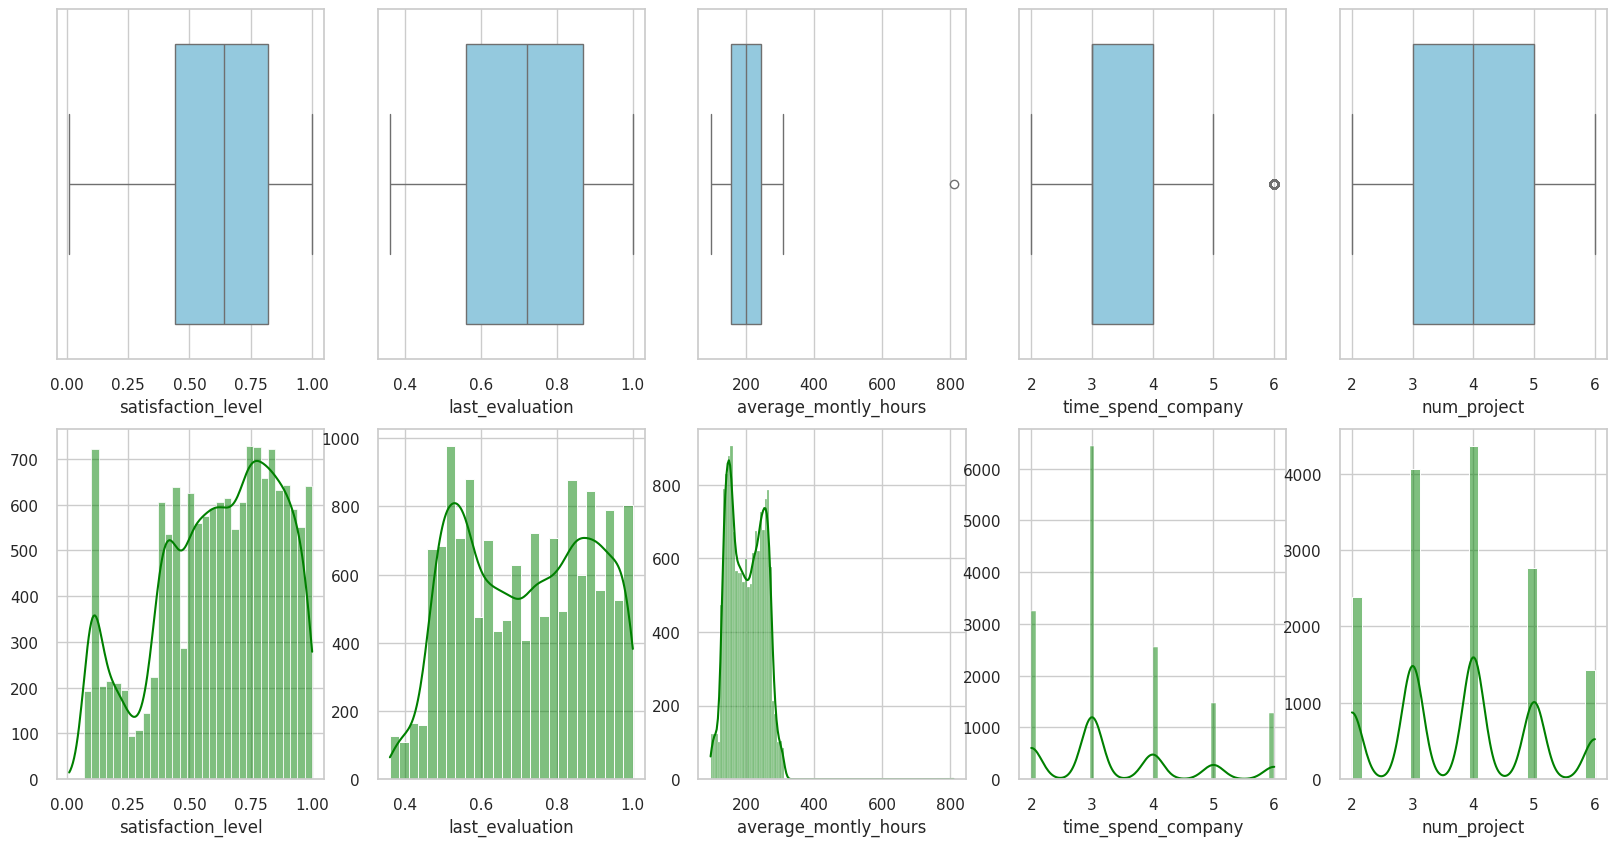

In [383]:
# MONTAR BOXPLOTS PARA VERIFICAR A DISTRIBUIÇÃO E OUTLIERS
# Selecionando apenas as colunas numéricas não categóricas
numeric_cols = ['satisfaction_level', 'last_evaluation', 'average_montly_hours',
                'time_spend_company', 'num_project']
# Configurar uma grade de 2 e 5 colunas
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

# Plotar os 10 gráficos
for i, col in enumerate(numeric_cols):
    # Linha 1 boxplots
    sb.boxplot(x=df[col], ax=ax[0,i], color='skyblue')
    # Linha 2 histogramas
    sb.histplot(x=df[col], ax=ax[1,i], color='green', kde=True)
    ax[1, i].set_ylabel('')

### Inferência sobre os dados - Analisando as distribuições

Os gráficos nos ajudam na análise e confirmam nossa avaliação sobre a variável **average_montly_hours** existe um ponto absurdamente fora da curva. 810 horas parece ser um erro de inclusão de dados, um erro de digitação talvez, pois é humanamnte impossível trabalhar tudo isso no mês, tendo em vista que um mês tem 720 horas apenas. Vamos excluir esse registro durante a fase de préprossessamento.

Também notamos outliers na variável **time_spend_company**, no entanto estes dados podem ser importantes para nosso modelo e vamos mantê-lo.

Analisando os histogramas das demais variáveis, podemos observar que:
- Considerando o **nível de satisfação**, parece existir grupos com sentimentos claros e se confirmando nosso quartil de 25%, existe um bom número de insatisfeitos, inclusive é possível notar um grande pico em 0,1.
- Já o gráfico da **última avaliação**, é o mais próximo de uma distribuição normal, o que pode representar um padrão no desempenho esperado do colaboradores
- **Tempo de empresa** e **número de projetos** apresentam uma distribuição discreta, pois os valores são apenas 2, 3, 4, 5 e 6 em ambos os casos.

**Com base no que foi analisado até agora, podemos começar formulando algumas perguntas**:

> *Será que o nível de satisfação influencia na evasão do colaborador?*

> *Será que a avaliação de desempenho pode influenciar na decisão de sair da empresa?*

> *A quantidade de horas trabalhadas é determinante para o colaborador decidir sair da empresa?*

Lembrando que até o momento analisamos apenas as variáveis numéricas não categóricas. Precisamos incluir na análise outras variáveis que possam ser relevantes, como as variáveis sobre acidente de trabalho, promoções nos últimos 5 anos, salário e departamento.






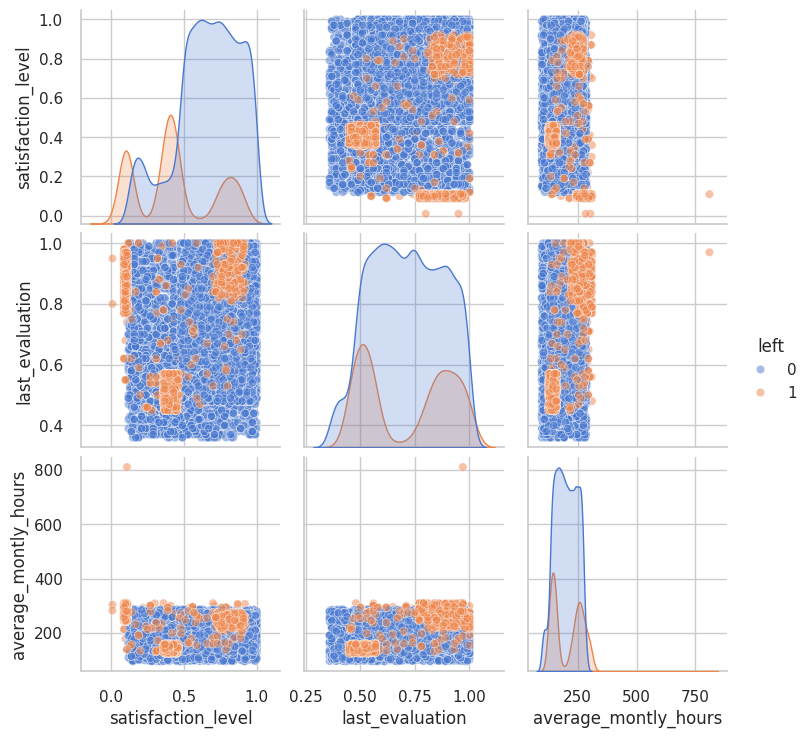

In [384]:
# Para responder aquelas 3 primeiras perguntas vamos analisar a correlação entre as variáveis
# Plotar pairplot
sb.pairplot(df,vars=['satisfaction_level','last_evaluation','average_montly_hours'], hue='left', plot_kws={'alpha':0.5})


### Inferência sobre os dados - Analisando as Correlações e Dispersões

Analisando o pairplot acima:
- O nível de satisfação parece influenciar na decisão, mas não parece o principal preditor, pois quando cruzamos o nível de satisfação com a última avaliação é possível perceber 3 grupos distintos que pediram para sair:
  - Um grupo com bom desempenho e com alta satisfação, localizado na parte superior direita da correlação;
  - Um grupo mais para a esquerda e com uma satisfação média de 0,40 e um desempenho médio de 0,50; e
  - Um grupo menor, concentrado no canto inferior direito da correlação, que possuem um alto desempenho, mas uma baixíssima satisfação com a empresa

Ainda é cedo para determinar a variável nível de satisfação como preditora de nosso modelo futuro.

Vamos entender melhor estes dados com utizando uma matriz de correlação com um heatmap.


<Axes: >

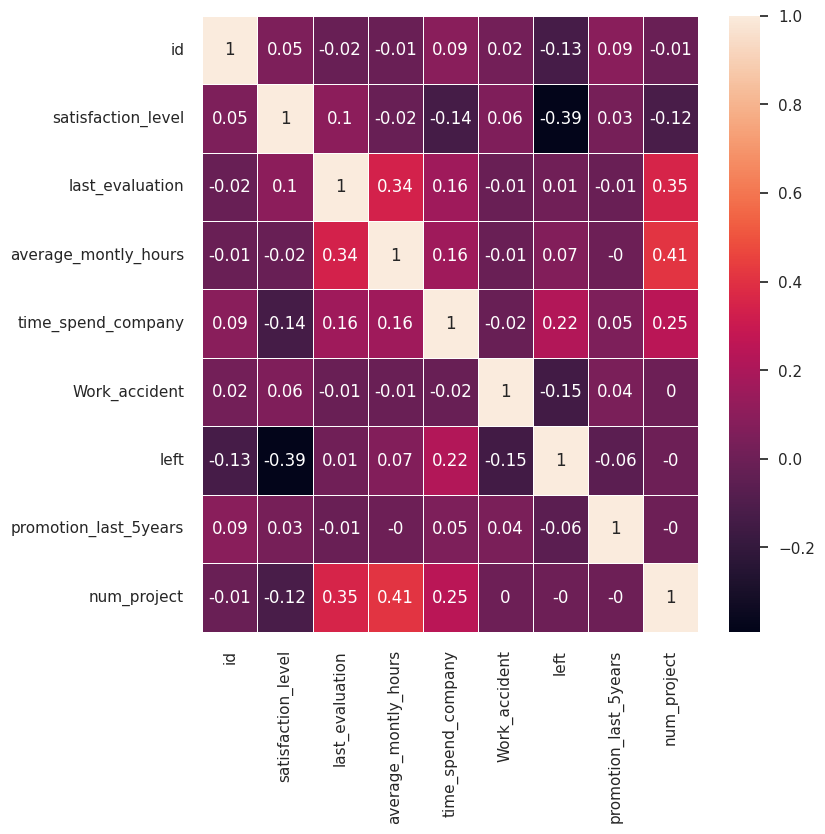

In [385]:
# Criar uma matriz de correlação
correlation_matrix = df.corr(numeric_only=True).round(2)
# Plotar a matriz de correlação com um heatmap
fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

### Inferência sobre os dados - Analisando a Matriz de Correlação - Sem as variáveis categóricas não binárias

- É possível observar que nossa variável de nível de satisfação parece ser um bom preditor. É uma correlação negativa que significa que as variáveis se movem em direções opostas, ou seja, quando mais insatisfeito o colaborador está, maior a chance de evasão.

**Importante**:
- Será que apenas essa variável como boa preditora nos ajudaria com um modelo que tome boas decisões? A decisão de saída, implica várias variáveis, desta forma podemos notar na matriz, que a variável tempo de empresa também parece ter uma certa correlação, só que dessa vez, positiva, ou seja, será que os colaboradores pedem para sair quando completam um determinado tempo de serviço?
- Ainda falta analisarmos os dados com as colunas categoricas, salário e departamento. Será que o Salário e/ou Departamento influenciam na decisão dos colaboradores?




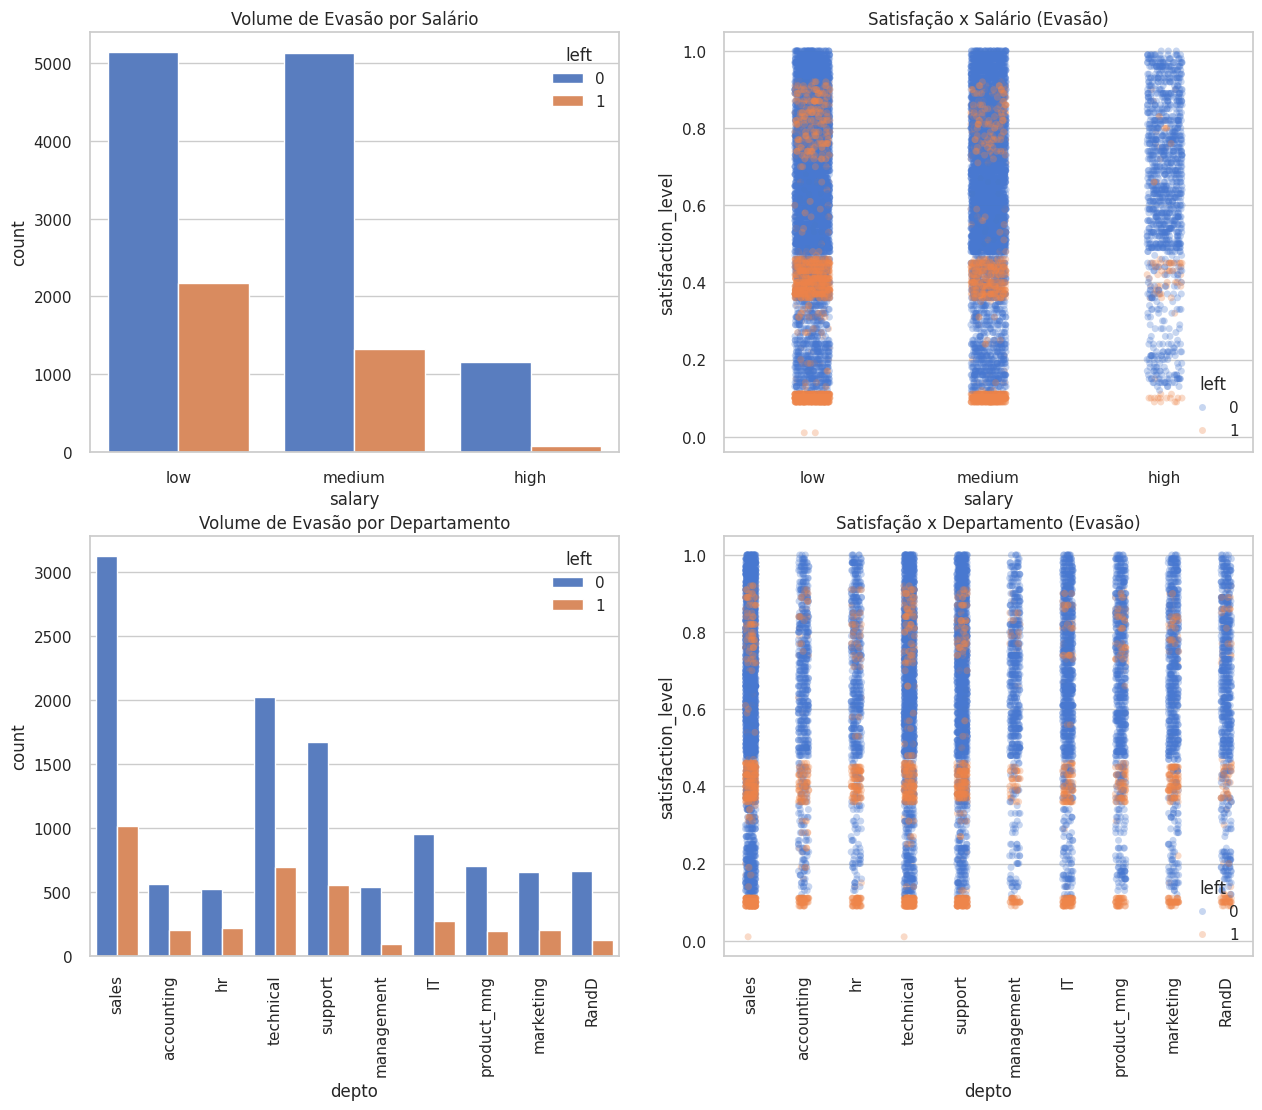

In [386]:
# Será que o salário ou o departamento em que se trabalha tem influência na evasão do colaborador?
# O nível de satistação e o (salário e/ou departamento) podem influenciar da saída dos colaboradores?
# Plotar gráficos de contagem e stripplot para análise das variáveis

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

sb.set_theme(style="whitegrid", palette="muted")

sb.countplot(data=df, x="salary", hue="left", ax=ax[0,0])
ax[0,0].set_title('Volume de Evasão por Salário')

sb.stripplot(data=df, x="salary", y="satisfaction_level", hue="left", ax=ax[0,1], jitter=True, alpha=0.3)
ax[0,1].set_title('Satisfação x Salário (Evasão)')

sb.countplot(data=df, x="depto", hue="left", ax=ax[1,0])
ax[1,0].set_title('Volume de Evasão por Departamento')
ax[1,0].tick_params(axis='x', rotation=90)

sb.stripplot(data=df, x="depto", y="satisfaction_level", hue="left", ax=ax[1,1], jitter=True, alpha=0.3)
ax[1,1].set_title('Satisfação x Departamento (Evasão)')
ax[1,1].tick_params(axis='x', rotation=90)


### Inferência sobre os dados - Analisando a influência das variáveis salário e departamento

- O **gráfico 1** mostra o volume de evasão por categoria de salário. O gráfico nos diz claramente que quanto menor o salário do colaborador, maior a chance dele sair da empresa. É possível notar que quanto maior o salário, menor fica a coluna laranja.
- No **gráfico 2** temos a correlação entre o salário e o nível de satistfação:
  - Colaboradores com um nível de satistfação médio de 0,4, possuem entre médio e baixo salários, no entanto é curioso notar uma concentração naqueles que tem um nível de satisfação igual a 0,1. Existe uma faixa entre 0,1 e 04, que se mantiveram na empresa mesmo com baixos salários.
  - É possível observar também algumas saídas de quem tem um nível de satisfação entre 0,7 e 0,9 nas faixas dos salários médio e baixo.
  - Podemos constatar que o salário pode ser um forte motivador de saída da empresa.

- O **gráfico 3** apresenta o volume de evasão por departamento. Observamos que áreas de vendas, técnicas e de suporte, tem a maior concentração de evasões.
- o **gráfico 4**, com a correlação entre o departamento e o nível de satisfação, nos confirma algo que parece ser a tendência, a faixa de satisfação de quem sai está na média de 0,4 e também há uma concentração em 0,1, semelhante a comparação feita entre salário e nível de satisfação.

Vamos transformar as variáveis salário e departamento em variáveis numéricas Dummy, usando a técnica de One-Hot Enconding e plotar um novo Heatmap para ver novamento como ficam as correlações.


In [387]:
# Criar um novo data frame com variáveis Dummy para Salary e Depto
# Vamos usar o parâmetro drop-first=True para excluirmos uma das colunas e
# evitarmos a multicolineraidade (Referência, livro Machine Learning Guia de Referência Rápida de Matt Harrisson, pág. 79)
# Pois uma das colunas dummie sempre é uma combinação linear das demais colunas

df_dummies = pd.get_dummies(df, columns=['salary', 'depto'], drop_first=True, dtype=int)
df_dummies.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,num_project,salary_low,salary_medium,depto_RandD,depto_accounting,depto_hr,depto_management,depto_marketing,depto_product_mng,depto_sales,depto_support,depto_technical
0,1,0.38,0.53,157,3,0,1,0,2,1,0,0,0,0,0,0,0,1,0,0
1,2,0.80,0.86,262,6,0,1,0,5,0,1,0,0,0,0,0,0,1,0,0
2,3,0.11,0.88,272,4,0,1,0,6,0,1,0,0,0,0,0,0,1,0,0
3,4,0.72,0.87,223,5,0,1,0,5,1,0,0,0,0,0,0,0,1,0,0
4,5,0.37,0.52,159,3,0,1,0,2,1,0,0,0,0,0,0,0,1,0,0


<Axes: >

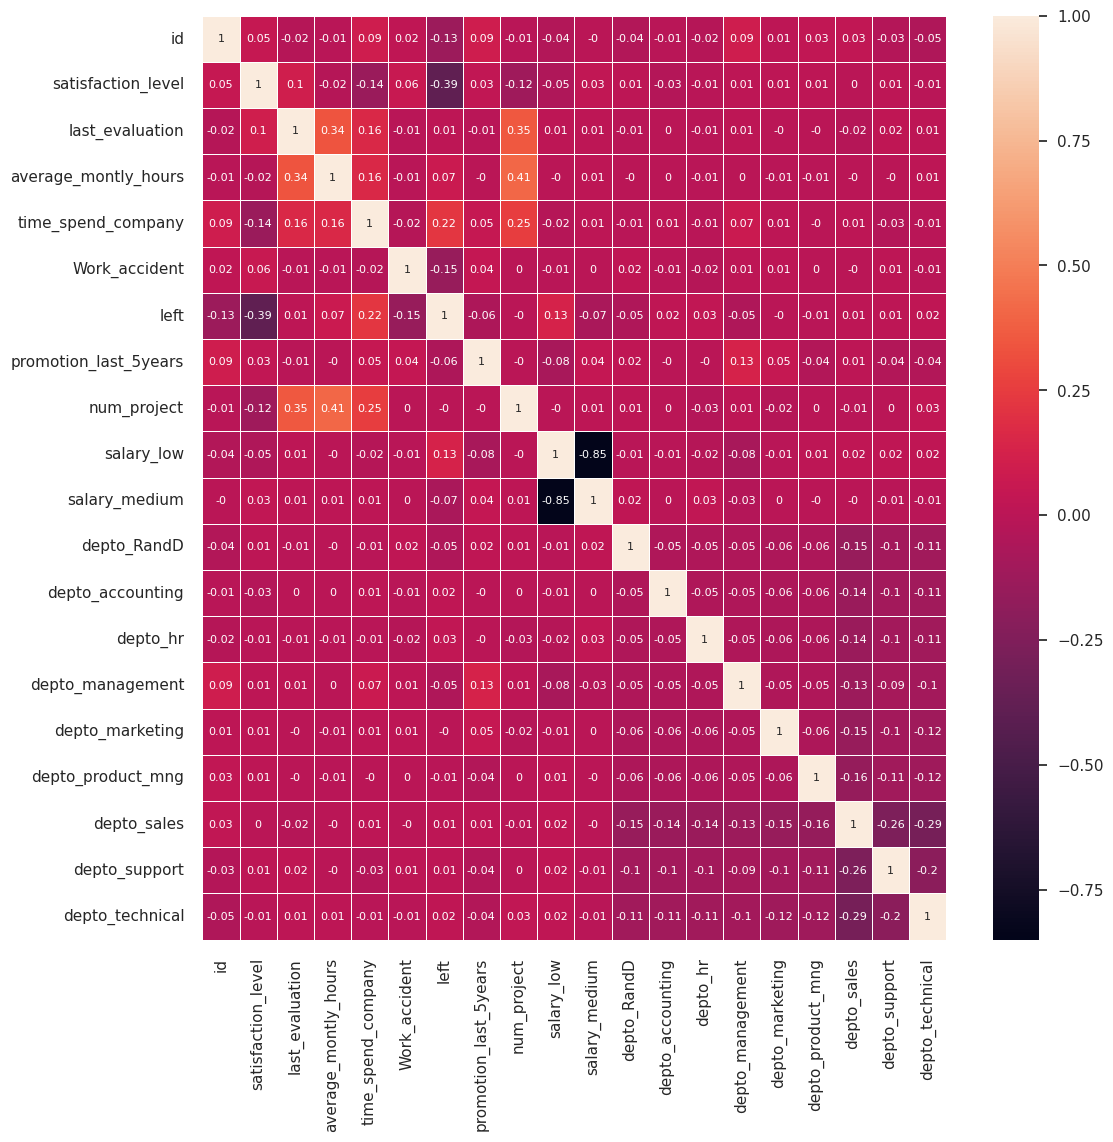

In [388]:
# Criar uma matriz de correlação para o novo data frame
correlation_matrix = df_dummies.corr(numeric_only=True).round(2)
# Plotar a matriz de correlação com um heatmap
fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data=correlation_matrix, annot=True, annot_kws={"size": 8}, linewidths=.5, ax=ax)

### CONCLUSÃO DA ANÁLISE - Inferência sobre os dados - Analisando a Matriz de Correlação - Com as variáveis categóricas não binárias

- A variável de nível de satisfação continua sendo a variável com maior melhor correlação.
- A variável dummy de baixo salário, tem 13% de correlação com nossa variável alvo, está abaixo do percentual de tempo de empresa, que é de 22%, mas vamos mantê-la em nosso dataset pata treinamento.
- As variáveis dummy referentes aos departamentos não parecem influenciar muito, então vamos excluílas do nosso dataset.

**Variáveis que serão mantidas no dataset final:**
- *satisfaction_level*: o nível de satisfação parece ser a melhor preditora em nosso dataset. Ela nos diz que quanto menor o nível de satisfação (correlação negativa), maior é a probablidade do colaborador sair da empresa
- *time_spend_company*: esta variável é curiosa, possui uma correlação positiva de 22%, o que pode indicar que as pessoas que pedem para sair tem um tempo de casa maior que os demais.
- *Work_accident*: com uma correlação de -13%, vamos manter essa variável. Curioso ter essa correlação negativa.
- *salary_low e salary_medium*: iremos manter as duas, para termos a referência para salário alto.

**Vamos manter também as variáveis:**
- *average_monthly_hours, num_project e last_evaluation*: variáveis que representam o desempenho dos colaboradores, elas apresentam correlação interessantes entre si.


> As demais variáveis serão excluídas. Também vamos aproveitar para excluir o registro outlier que está com 810 horas trabalhadas em um mês.

> Vamos analisar também como está o balanceamento do nosso Dataset, verificando a quantidade e o percentual de quem saiu.

In [389]:
# Lista de colunas que serão mantidas
colunas_selecionadas = [
    'satisfaction_level',
    'last_evaluation',
    'num_project',
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'salary_low',
    'salary_medium',
    'left' # variável alvo
]

# Criando o novo DataFrame
df_final = df_dummies[colunas_selecionadas].copy()

# Exclusão do outlier
# Mantém apenas quem trabalhou menos de 810 horas
shape = df_final.shape
print(f"O dataset final possui {shape[0]} linhas e {shape[1]} colunas. Antes da exclusão do Outlier")
df_final = df_final[df_final['average_montly_hours'] < 810]
shape = df_final.shape
print(f"O dataset final possui {shape[0]} linhas e {shape[1]} colunas. Depois da exclusão do Outlier")

df_final.head()

O dataset final possui 14999 linhas e 9 colunas. Antes da exclusão do Outlier
O dataset final possui 14998 linhas e 9 colunas. Depois da exclusão do Outlier


,satisfaction_level,last_evaluation,num_project,average_montly_hours,time_spend_company,Work_accident,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,0,1,1
2,0.11,0.88,6,272,4,0,0,1,1
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1


In [390]:
df_final.groupby('left').mean()

,satisfaction_level,last_evaluation,num_project,average_montly_hours,time_spend_company,Work_accident,salary_low,salary_medium
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.260326,0.175009,0.450123,0.448810
1,0.440146,0.718042,3.783193,207.390476,3.876471,0.047339,0.608403,0.368627


Validando as médias de cada variável, fica nítido que pessoas com menor salário tendem a sair (aproximadamente ~68%). Nossa hipótese de quem tem um salário menor é mais propenso a evasão começa a fazer sentido. Também é possível perceber que estas pessoas trabalham mais horas e também avaliam a empresa com 0,44 como podemos ver nos gráficos anteriores.

In [391]:
# Contagem total de cada classe
print("Contagem absoluta:")
print(df_final['left'].value_counts())

# Proporção em percentual
print("\nProporção percentual:")
print((df_final['left'].value_counts(normalize=True) * 100).round(2))

Contagem absoluta:
left
0    11428
1     3570
Name: count, dtype: int64

Proporção percentual:
left
0    76.2
1    23.8
Name: proportion, dtype: float64


A quantindade de colaboradores que sairam da empresa está bem abaixo de quem permaneceu, vamos bater esses dados com nossos datasets de treino e teste para validar se a proporção foi respeitada.

# 2. TREINO DOS MODELOS

**ATENÇÃO SERÁ NECESSÁRIO ESCALONAR OS DADOS**
O dataset possui variáveis com escalas diferentes (exemplo, sactisfaction_level vai de 0 a 1, enquanto average_montly_hours vai até 310), será necessário escaloná-los usando StandardScaler.

**NOTA**: estou usando como referência o *Livro Machine Learning: Guia de Referência Rápida de Matt Harrison*, e utilizando algumas técnicas demonstradas no livro.

In [392]:
# Preparando nossas variáveis independentes e a variável target
X = df_final.drop('left', axis=1)
y = df_final['left']

In [393]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Serão avaliados 5 modelos de classificação
from sklearn.linear_model import LogisticRegression # Regressão Logística
from sklearn.svm import SVC # SVM
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Árvore de Decisão
from sklearn.ensemble import RandomForestClassifier # Floresta Aleatória

In [394]:
# Separando a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f'O dataset de treino possui {X_train.shape[0]} linhas e {X_train.shape[1]} colunas')
print(f'O dataset de teste possui {X_test.shape[0]} linhas e {X_test.shape[1]} colunas')

# Escalonando os datasets de treino e teste
scaler = StandardScaler()

# Ajustar o scaler e transformar os dados de treino
X_train_escalonado = scaler.fit_transform(X_train)

# Transformar os dados de teste usando o scaler ajustado nos dados de treino
X_test_escalonado = scaler.transform(X_test)

O dataset de treino possui 11998 linhas e 8 colunas
O dataset de teste possui 3000 linhas e 8 colunas


In [395]:

print("\nComparativo para validar o balanceamento da variável target:")
total = df_final['left'].value_counts(normalize=True) * 100
treino = y_train.value_counts(normalize=True) * 100
teste = y_test.value_counts(normalize=True) * 100

tabela_comparativa = pd.DataFrame({
    'Dataset Final (%)': total,
    'Treino (%)': treino,
    'Teste (%)': teste
}).round(2)

tabela_comparativa.index = ['Permanência (0)', 'Evasão (1)']
print(tabela_comparativa)


Comparativo para validar o balanceamento da variável target:
                 Dataset Final (%)  Treino (%)  Teste (%)
Permanência (0)               76.2        76.2       76.2
Evasão (1)                    23.8        23.8       23.8


In [487]:
# Primeiro Modelo - Regressão Logistica
modelo_regressao_logistica = LogisticRegression(random_state=42)
modelo_regressao_logistica.fit(X_train_escalonado, y_train)
# Faz uma predição com o primeiro registro do nosso X escalonado
print(f'Saiu: {modelo_regressao_logistica.predict([X_train_escalonado[0]])}')
print(f'Proba:\nChance de permanecer na empresa {modelo_regressao_logistica.predict_proba([X_train_escalonado[0]])[0][0].round(2)}\nChance de não permanecer {modelo_regressao_logistica.predict_proba([X_train_escalonado[0]])[0][1].round(2)}')
print(f'Score: {modelo_regressao_logistica.score(X_test_escalonado, y_test)}')

Saiu: [0]
Proba:
Chance de permanecer na empresa 0.76
Chance de não permanecer 0.24
Score: 0.787


### Interpretando o Intercepto e os Coeficientes
Antes de avaliar definitivamente o modelo de Regressão Logistica vamos analisar e interpretar os resultados do intercepto e dos coeficientes.


In [397]:
# Interpretando o Intercepto e os coeficientes (função extraída do livro de Harrisson)
def inv_logit(p):
  return np.exp(p) / (1 + np.exp(p))

print(f'O intercepto é: {modelo_regressao_logistica.intercept_}')
print(f'A proporção é: {inv_logit(modelo_regressao_logistica.intercept_)}')

O intercepto é: [-1.64459554]
A proporção é: [0.16184072]


Nosso intercepto é de ~-1,64. O negativo representa que na média a propabilidade de saída da empresa é menor que 50% para left = 1 (true). Utilizando a função do Livro de Matt Harrison, fazemos a conversão para precisão percentual (proporção), para sabermos quais as chances de um colaborador sair da empresa, com a função chegamos a ~16%. Nosso dataset real, tem 24% de evasão. Vamos analisar os coeficientes para verificar a importância de cada um na decisão do modelo.

In [398]:
# Inspecionando os coeficientes
modelo_regressao_logistica.coef_

# Criar a lista com os atributos e listar por ordem decrescente de importância
cols = X.columns
for col, val in sorted(zip(cols, modelo_regressao_logistica.coef_[0]), key=lambda x: x[1], reverse=True):
  print(f'{col:10}{val:10.3f} {inv_logit(val):10.3f}')

salary_low     0.979      0.727
salary_medium     0.692      0.666
time_spend_company     0.606      0.647
average_montly_hours     0.232      0.558
last_evaluation     0.117      0.529
num_project    -0.514      0.374
Work_accident    -0.550      0.366
satisfaction_level    -1.022      0.265


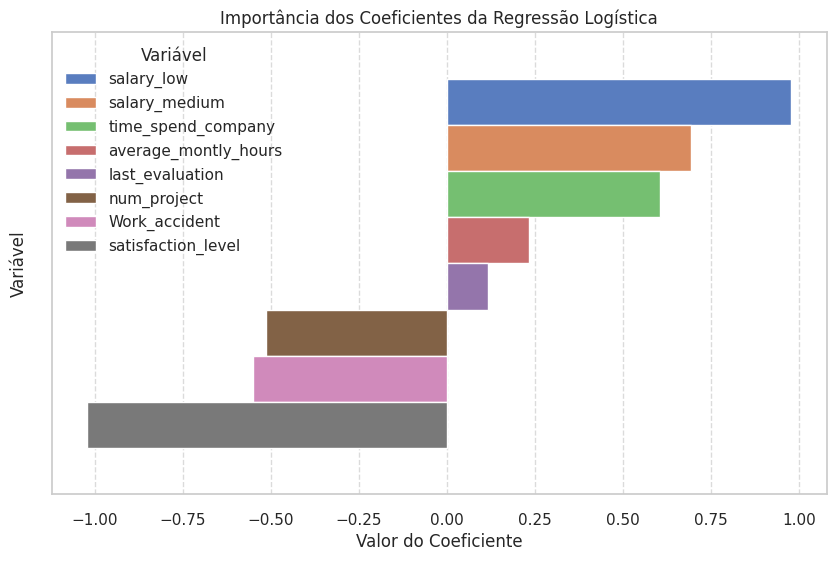

In [399]:
# Vamos visualizar a importância ddos coeficientes graficamente
# Criar um DataFrame para os coeficientes
df_coef = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': modelo_regressao_logistica.coef_[0]
})

# Ordenar os coeficientes para melhor visualização
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Plotar os coeficientes
sb.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 6))
sb.barplot(data=df_coef, x='Coeficiente', hue='Variável')
plt.title('Importância dos Coeficientes da Regressão Logística')
plt.xlabel('Valor do Coeficiente')
plt.ylabel('Variável')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

As barras para a direita, mostram as variáveis preditoras que aumentam as chances de um colaborador sair da empresa:
- O salário baixo (como já vínhamos percebendo ao longo de toda a análise) é a variável mais forte, aproximadamente 98% de chances de evasão de um colaborador.
- As variáveis salário médio e tempo de empresa também são fortes preditoras.
- As horas trabalhadas tem uma certa importância, mas não tão relevante.
- A última avaliação também aparece como positiva, isso pode indicar que talentos podem estar saindo para o mercado. Isso não significa que tenham baixo ou médios salários (se retornarmos em alguns gráficos da análise, podemos ver claramente o pontinhos laranja em relação aos altos salários)

As barras para a esquerda nos dizem o contrário, quais as chances de permanecerem na empresa?
- O nível de satisfação é variável mais forte, ou seja quanto maior a satisfação do colaborador, maior a chance de permanecer na empresa. Notem que o percentual é praticamente o mesmo do baixo salário, só que ao contrário.

In [488]:
# Segundo Modelo - SVM
modelo_svm = Pipeline([
    ("modelo_svc", SVC(kernel="poly", degree=3, coef0=1, C=5, probability=True))
])
modelo_svm.fit(X_train_escalonado, y_train)
svm = modelo_svm.named_steps["modelo_svc"]
# Faz uma predição com o primeiro registro do nosso X escalonado
print(f'Saiu: {modelo_svm.predict([X_train_escalonado[0]])}')
print(f'Proba:\nChance de permanecer na empresa {svm.predict_proba([X_train_escalonado[0]])[0][0].round(2)}\nChance de não permanecer {svm.predict_proba([X_train_escalonado[0]])[0][1].round(2)}')
print(f'Score: {svm.score(X_test_escalonado, y_test)}')

Saiu: [0]
Proba:
Chance de permanecer na empresa 0.87
Chance de não permanecer 0.13
Score: 0.9633333333333334


### Interpretando os resultados dos Vetores de Suporte


In [401]:
# Quantidade de vetores de suporte por classe
print(f"Vetores de suporte por classe: {svm.n_support_}")

# Indices dos vetores de suporte
indices_suporte = svm.support_
print(f'Índice dos vetores de suporte: {indices_suporte}')

# Quantidade de registros no X_train_escalonado
print(f'Quantidade de registros no X_train_escalonado: {X_train_escalonado.shape[0]}')

Vetores de suporte por classe: [695 654]
Índice dos vetores de suporte: [   24    46    93 ... 11986 11987 11989]
Quantidade de registros no X_train_escalonado: 11998


Analisando os resultados do treinamento do modelo SVM
- A soma de vetores por classe é 1349, o que reprsenta um bom número se comparmos o número de registro que temos no treinamento, que são 11998, cerca de 11% do dataset de treinamento, número de vetores baixos podem apontar uma boa capacidade de generalização.

Text(0, 0.5, 'Média de Erro')

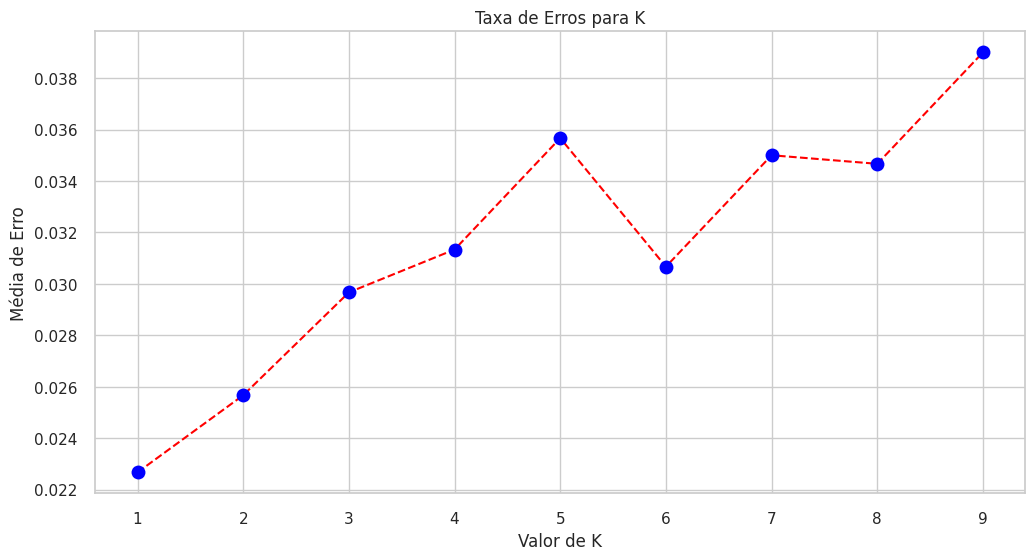

In [402]:
# Terceiro Modelo - KNN - PROCURANDO O MELHOR K
# Vamos fazer uma pré avaliação do modelo, pois precisamos saber o K que melhor
# atenderá nosso modelo
# Vamos treinar o modelo e coletar os erros para K entre 1 e 10
error = []
for i in range(1, 10):
  modelo_knn = KNeighborsClassifier(n_neighbors=i)
  modelo_knn.fit(X_train_escalonado, y_train)
  previsao = modelo_knn.predict(X_test_escalonado)
  error.append(np.mean(previsao != y_test))

# Plotar gráfico de linha para verificar qual o melho K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taxa de Erros para K')
plt.xlabel('Valor de K')
plt.ylabel('Média de Erro')

### Interpretando o resultado dos treinos

- O melhor K é o 6, pois após a subida de erros até K = 5 vem um ajuste e um vale se forma baixando a taxa de erros novamente, no entanto, 6 é um número par e o modelo pode gerar empates e escolher um resultado aleatório para desempatar a decisão. Para não termos esse problema, vamos treinar o modelo com K 6 e 7 e ver qual se sai melhor.

In [489]:
# Terceiro Modelo - KNN com K = 6
modelo_knn_K6 = KNeighborsClassifier(n_neighbors=6)
modelo_knn_K6.fit(X_train_escalonado, y_train)
# Faz uma predição com o primeiro registro do nosso X escalonado
print(f'Saiu: {modelo_knn_K6.predict([X_train_escalonado[0]])}')
print(f'Proba:\nChance de permanecer na empresa {modelo_knn_K6.predict_proba([X_train_escalonado[0]])[0][0].round(2)}\nChance de não permanecer {modelo_knn_K6.predict_proba([X_train_escalonado[0]])[0][1].round(2)}')
print(f'Score: {modelo_knn_K6.score(X_test_escalonado, y_test)}')

Saiu: [0]
Proba:
Chance de permanecer na empresa 1.0
Chance de não permanecer 0.0
Score: 0.9693333333333334


In [490]:
# Terceiro Modelo - KNN com K = 7
modelo_knn_K7 = KNeighborsClassifier(n_neighbors=7)
modelo_knn_K7.fit(X_train_escalonado, y_train)
# Faz uma predição com o primeiro registro do nosso X escalonado
print(f'Saiu: {modelo_knn_K7.predict([X_train_escalonado[0]])}')
print(f'Proba:\nChance de permanecer na empresa {modelo_knn_K7.predict_proba([X_train_escalonado[0]])[0][0].round(2)}\nChance de não permanecer {modelo_knn_K7.predict_proba([X_train_escalonado[0]])[0][1].round(2)}')
print(f'Score: {modelo_knn_K7.score(X_test_escalonado, y_test)}')

Saiu: [0]
Proba:
Chance de permanecer na empresa 1.0
Chance de não permanecer 0.0
Score: 0.965


In [491]:
# Quarto Modelo - Árvore de Decisão
# NOTA: Árvores de decisão não precisam ter os dados escalonados
# Vamos treinar o modelo sem dados escalonados
modelo_arvore_decisao = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=42)
modelo_arvore_decisao.fit(X_train, y_train)
# Faz uma predição com o primeiro registro do nosso X escalonado
print(f'Saiu: {modelo_arvore_decisao.predict(X_train.iloc[[0]])}')
print(f'Proba:\nChance de permanecer na empresa {modelo_arvore_decisao.predict_proba(X_train.iloc[[0]])[0][0].round(2)}\nChance de não permanecer {modelo_arvore_decisao.predict_proba(X_train.iloc[[0]])[0][1].round(2)}')
print(f'Score: {modelo_arvore_decisao.score(X_test, y_test)}')

Saiu: [0]
Proba:
Chance de permanecer na empresa 0.99
Chance de não permanecer 0.01
Score: 0.8213333333333334


### Interpretando os resultados do treinamento

Vamos plotar grafiamente a arvore utilzando o plottree. Definimos a profundiade da árvore (max_depth) em 2 para ficar melhor de visualizar nosso gráfico.

[Text(0.5, 0.8333333333333334, 'satisfaction_level <= 0.465\nentropy = 0.792\nsamples = 11998\nvalue = [9142, 2856]\nclass = Fica'),
 Text(0.25, 0.5, 'satisfaction_level <= 0.115\nentropy = 0.969\nsamples = 3345\nvalue = [1326, 2019]\nclass = Sai'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 709\nvalue = [0, 709]\nclass = Sai'),
 Text(0.375, 0.16666666666666666, 'entropy = 1.0\nsamples = 2636\nvalue = [1326, 1310]\nclass = Fica'),
 Text(0.75, 0.5, 'time_spend_company <= 4.5\nentropy = 0.459\nsamples = 8653\nvalue = [7816, 837]\nclass = Fica'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.106\nsamples = 7055\nvalue = [6957, 98]\nclass = Fica'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.996\nsamples = 1598\nvalue = [859, 739]\nclass = Fica')]

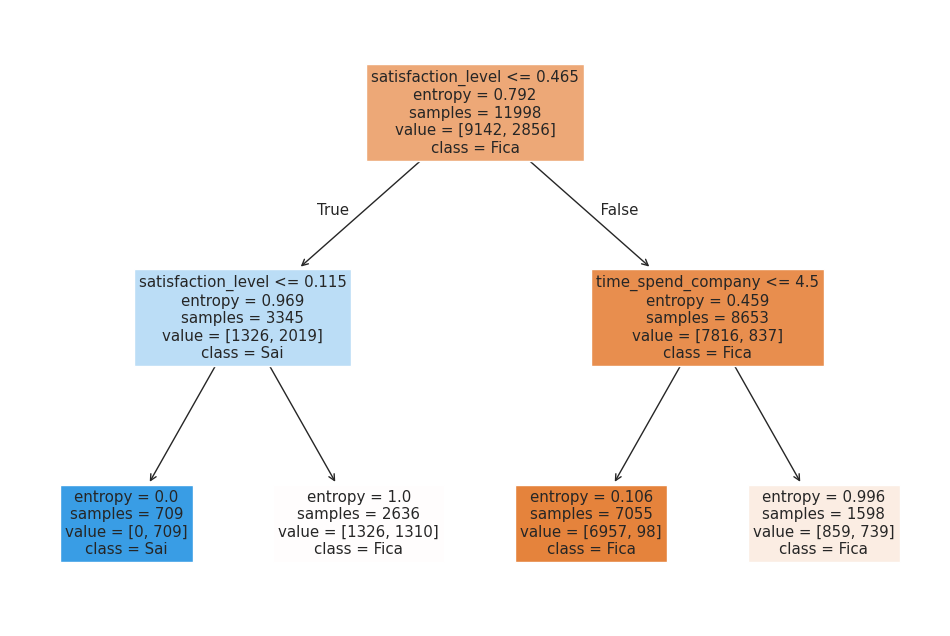

In [457]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn import tree

class_names = ['Fica', 'Sai']
label_names = X.columns.tolist()

fig, axes = plt.subplots(1, 1, figsize = (12,8))

tree.plot_tree(modelo_arvore_decisao,
               feature_names = label_names,
               class_names=class_names,
               filled = True)

**A árvore com dados escalonados**

Apresenta no topo a variável de nível de satisfação, o que é curioso, pois até o momento nossa hipótese se baseia em salários baixos para definir a saída ou não de um colaborador. De qualquer forma, esta varíavel é o oposto da variável de baixo salário, então, aparentemente a escolha do algoritma é valida.

- *Nó principal:* Colaboradores com um nível de satifação menores ou iguais a 0,46, seguem para a esquerda (propensos a sair da empresa). Podemos reparar que do montante de funcionários iniciais no nosso dataset de treino (11.998 em samples), 9142, tem a tendência inicial de ficar, posição 0 do array value do nó principal.
- *Caminho da esquerda:* colaboradores com tendência a sair da empresa. Nesta folha o modelo faz uma segunda pergunta sobre o nível de satisfação, agora com um valor baixíssimo (relembre os gráficos das análises, estes níveis baixos podem ser visualizados neles). Se um colaborador tem um nível de satisfação abaixo ou igual a 0,11 o grupo cai no nó com azul mais escuro. A entropia igual a 0 (zero) nos indica que todos os 709 neste grupo sairam da empresa. Os que não caem nessa regra, vão para o nó na cor branca, cm entropia igual a 1, aqui parece haver uma indicisão, a quantidade de colaboradores está dividida ao meio entre quem fica e quem sai.
- *Caminho da direita:* se o nivel de satisfação for maior que 0,46, o modelo faz a pergunta referente ao tempo de empresa da pessoa. Se o tempo de empresa é menor ou igual a 4,5 anos o grupo vai para o nó de cor laranja mais forte, este é o grupo mais estável 7055, dos quais 6957 ficaram na empresa.

Vamos agora plotar um gráfico do pacote dtreeviz, que pode nos apoiar na compreensão de como a árvore funciona. Código retirado do livro de Matt Harrison


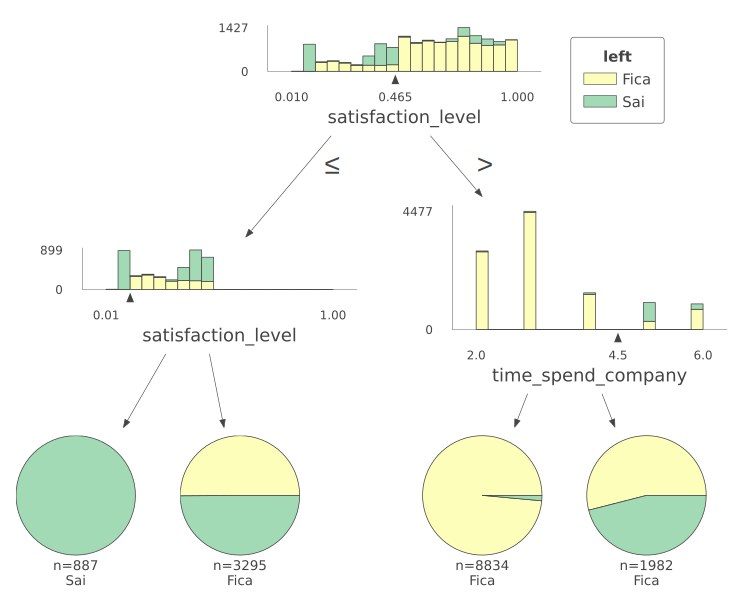

In [452]:
# Configuração para visualização com o dtreeviz
viz_model = dtreeviz.model(modelo_arvore_decisao,
                           X,
                           y,
                           target_name="left",
                           feature_names=label_names,
                           class_names=class_names,
                           ai_chat=False)

# Renderiza o gráfico
v = viz_model.view(scale=2)
# Plotagem
v

Visualmente é bem mais interssante. Pois conseguimos visualizar as regras e as decisões em gráficos de barras e de pizza nos nós base. Muito melhor para a interpretação.

In [448]:
# Verificando a importância dos atributos
for col, val in sorted(zip(cols, modelo_arvore_decisao.feature_importances_), key=lambda x: x[1], reverse=True)[:2]:
  print(f'{col:10}{val:10.3f}')

satisfaction_level     0.640
time_spend_company     0.360


In [492]:
# Quinto modelo - Floresta Aleatória
# NOTA: Árvores aleatórias também não precisam ter os dados escalonados
# Vamos treinar o modelo sem dados escalonados
modelo_floresta_aleatoria = RandomForestClassifier(n_estimators=6, max_depth=2, criterion='entropy', random_state=42)
modelo_floresta_aleatoria.fit(X_train, y_train)
# Faz uma predição com o primeiro registro do nosso X
print(f'Saiu: {modelo_floresta_aleatoria.predict(X_train.iloc[[0]])}')
print(f'Proba:\nChance de permanecer na empresa {modelo_floresta_aleatoria.predict_proba(X_train.iloc[[0]])[0][0].round(2)}\nChance de não permanecer {modelo_floresta_aleatoria.predict_proba(X_train.iloc[[0]])[0][1].round(2)}')
print(f'Score: {modelo_floresta_aleatoria.score(X_test, y_test)}')

Saiu: [0]
Proba:
Chance de permanecer na empresa 0.85
Chance de não permanecer 0.15
Score: 0.908


### Interpretando o resultado do treinamento

Vamos plotar o gráfico com as 6 árvores definidas por meio do nosso n_estimators

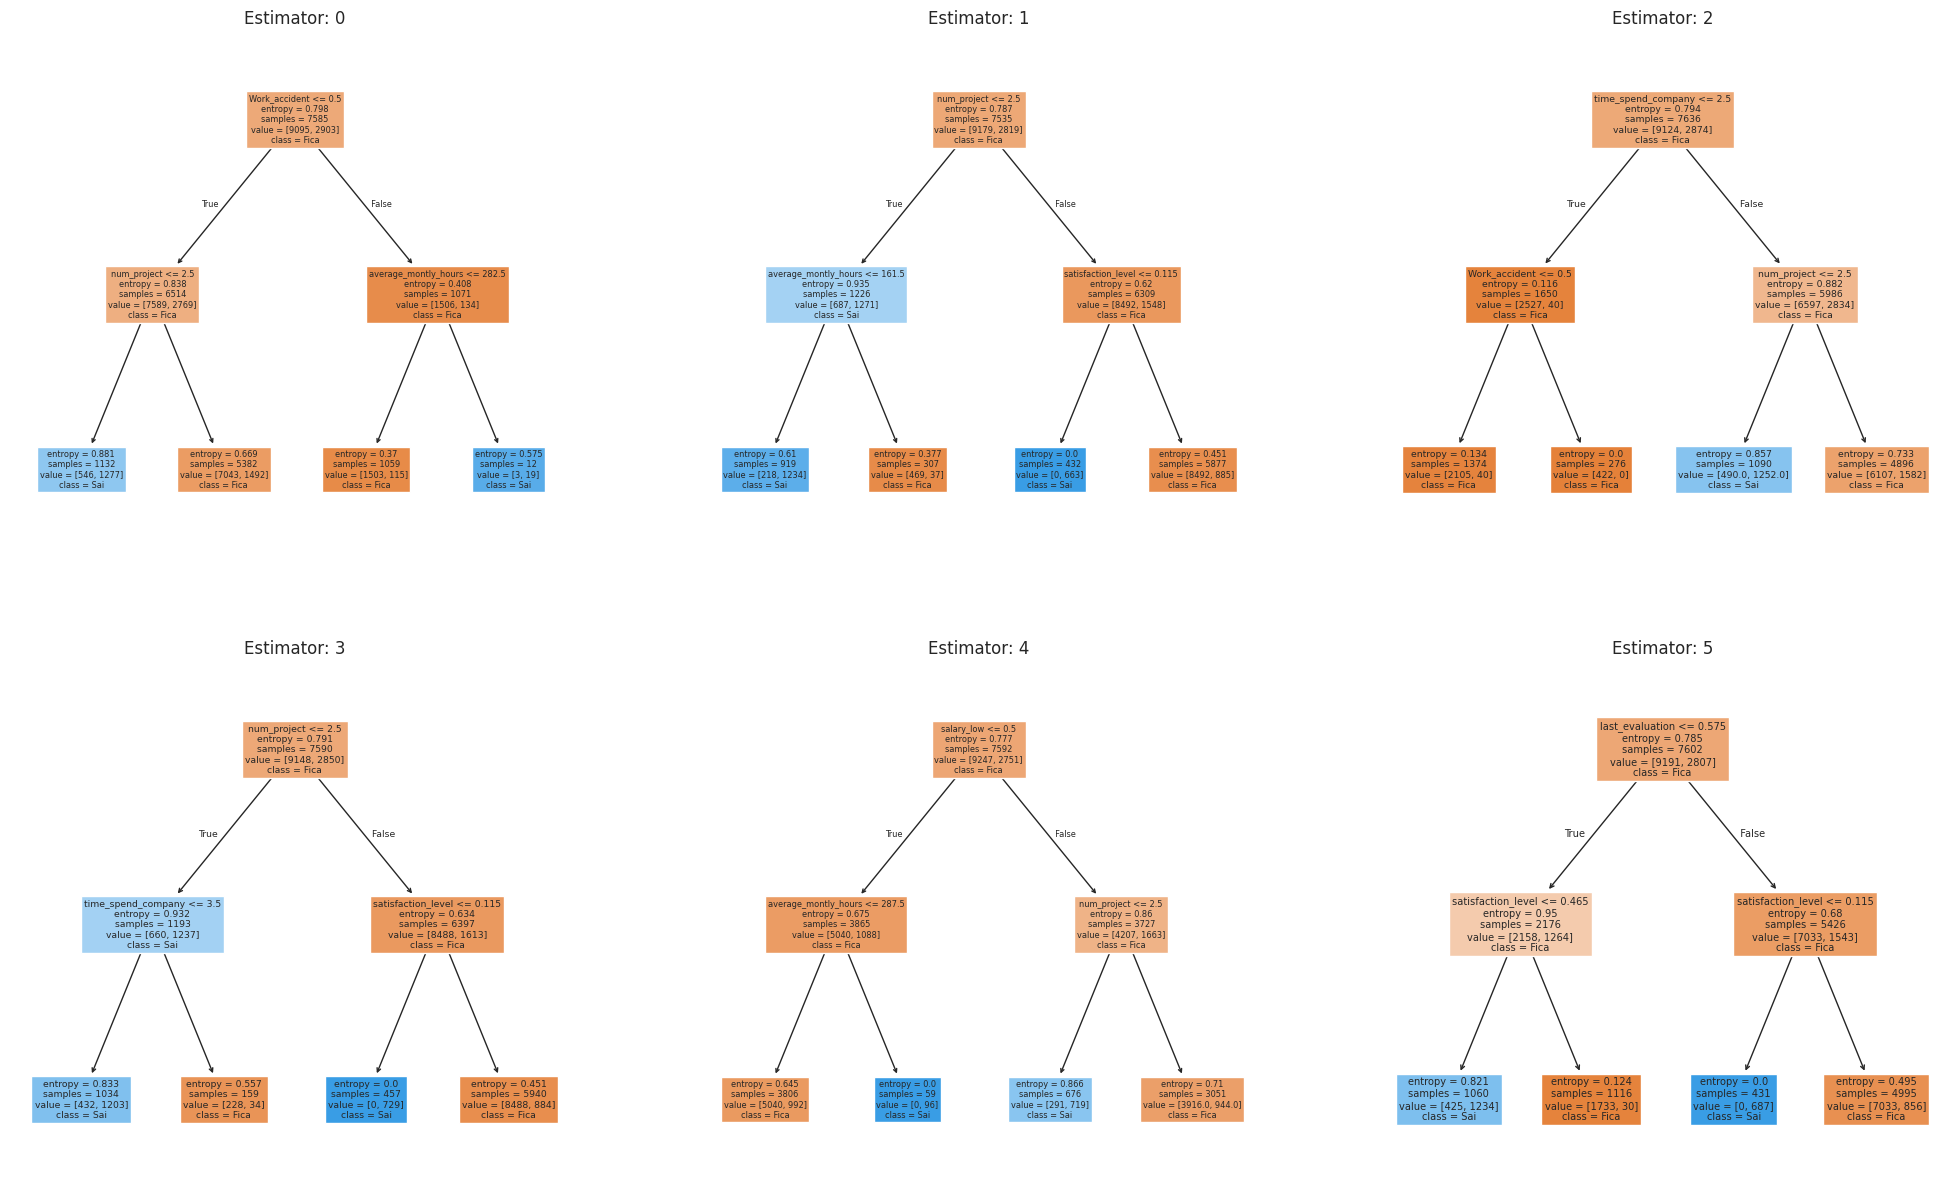

In [481]:
# Cria um gráfico com as 6 árvores
fig, axes = plt.subplots(2, 3, figsize=(25, 15), dpi=100)
for i, ax in enumerate(axes.flatten()):
    tree.plot_tree(modelo_floresta_aleatoria.estimators_[i],
                  feature_names = label_names,
                  class_names=class_names,
                  filled = True,
                  ax = ax);

    ax.set_title('Estimator: ' + str(i))

In [483]:
# Verificando a importância dos atributos
for col, val in sorted(zip(cols, modelo_floresta_aleatoria.feature_importances_), key=lambda x: x[1], reverse=True)[:7]:
  print(f'{col:10}{val:10.3f}')

num_project     0.454
satisfaction_level     0.330
time_spend_company     0.084
average_montly_hours     0.073
Work_accident     0.024
salary_low     0.021
last_evaluation     0.014


O modelo classificou a variável número de projetos com o maior valor de importância para redução de erro. Não parece uma escolha muito boa. a variável de salário baixo está em sexto lugar na classificação.

Na próxima sessão iremos avaliar nossos modelos e compará-los entre si para chegarmos ao melhor modelo

# 3. AVALIAÇÃO DOS MODELOS E ESCOLHA DO MELHOR

Para avaliar nossos modelos, vamos:
1. plotar as matriz de confusão
2. validar as acurácias
3. plotar os relatórios de classificação (precision, recall, f1-score)
4. plotar as curvas ROC

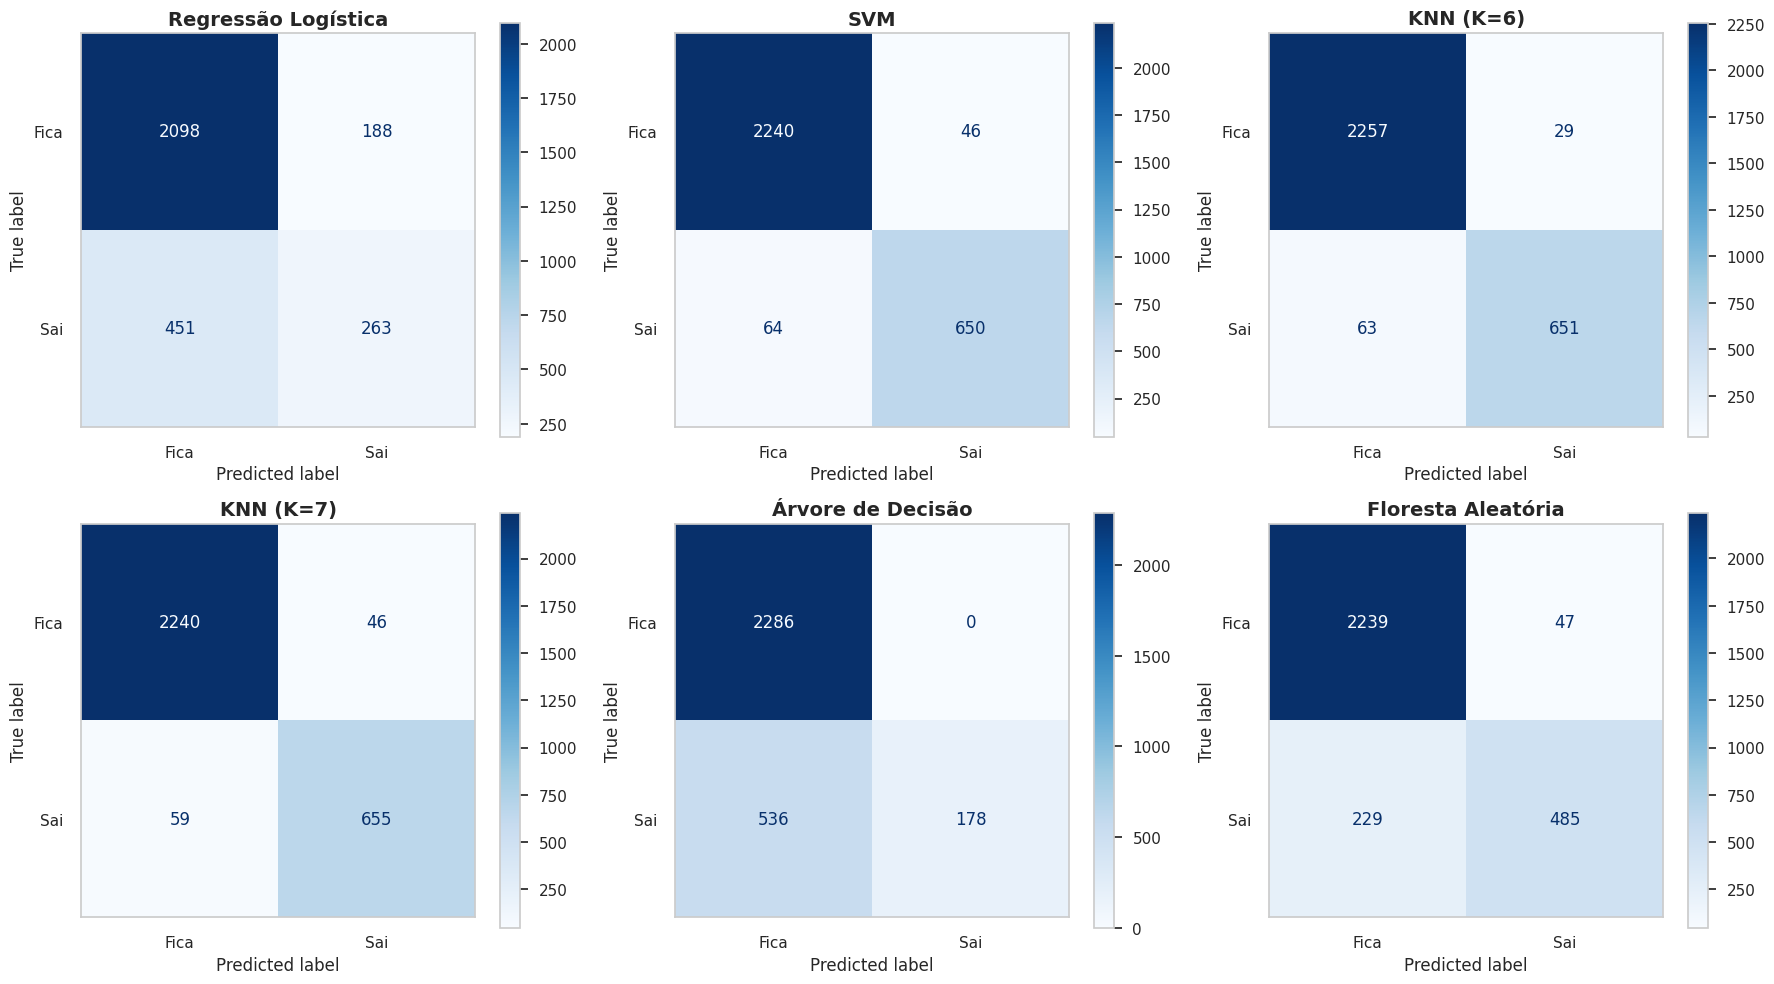

In [519]:
# Matriz de confusão
from sklearn.metrics import ConfusionMatrixDisplay

# Modelos
modelos = [modelo_regressao_logistica, modelo_svm, modelo_knn_K6, modelo_knn_K7, modelo_arvore_decisao, modelo_floresta_aleatoria]
modelos_nomes = ["Regressão Logística", "SVM", "KNN (K=6)", "KNN (K=7)", "Árvore de Decisão", "Floresta Aleatória"]

# Criar uma grade de 2 linhas e 3 colunas
fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=100)
axes = axes.flatten()

# Loop para plotar cada matriz
for i, modelo in enumerate(modelos):
    # Para os modelos de árvores, utilizei os dados originais
    if "Árvore" in modelos_nomes[i] or "Floresta" in modelos_nomes[i]:
        X_avaliacao = X_test
    else:
        X_avaliacao = X_test_escalonado

    ConfusionMatrixDisplay.from_estimator(
        modelo,
        X_avaliacao,
        y_test,
        display_labels=['Fica', 'Sai'],
        cmap='Blues',
        ax=axes[i]
    )
    axes[i].set_title(modelos_nomes[i], fontsize=14, fontweight='bold')
    axes[i].grid(False) # Remove linhas de grade internas para clareza

plt.tight_layout()
plt.show()

### Avaliando as matrizes de confusão
*Falso Negativo*: prever que alguém fica, mas a pessoa sai (pode gerar mais custo operacional para as áreas de RH)

*Falso Positivo*: prever que a pessoa vai sair, mas ela fica

**Regressão Logística**
- De longe, o pior desempenho, pois teve o maior número de falsos positivos, 188; e um número alto de falsos negativos, 451.

**SVM e KNNs**
- Parecem ser os modelos que melhor atendem o problema
- Os dois KNNs K=6 e K=7, apresentam os menores números de falsos negativos, 63 e 59 respectivamente
- Já o SVM, apresenta 64 casos no quadrante de falsos negativos. Isso valida o que vimos anteriormente com os 1349 vetores de suporte.

**Árvore de Decisão**
- Curiosamente este modelo teve uma precisão perfeita para os falsos positivos
- Em contrapartida, o modelo teve o pior caso de falsos negativos, 536 no total, o que leva esse modelo ser ineficaz para um plano de retenção.

**Floresta Aleatória**
- Teve um equilibrio melhor nos erros em comparação a árvore de decisão, detectando 485 saídas contra 178 da árvore.
- No entanto, ela ainda perde para os KNNs e SVM

Em resumo, KNN K=7 é o melhor e o SVM parece ser o mais equilibrado.

Vamos continuar nossa avaliação validando as métricas de acurácia, precision, recall e f1-score, para vermos se isto se confirma.

In [517]:
# Apresentando a acurácia
from sklearn.metrics import accuracy_score

print('--- ACURÁCIA DOS MODELOS ---')
for i, modelo in enumerate(modelos):
    # Para os modelos de árvores, utilizei os dados originais
    if "Árvore" in modelos_nomes[i] or "Floresta" in modelos_nomes[i]:
        X_avaliacao = X_test
    else:
        X_avaliacao = X_test_escalonado

    y_predito = modelo.predict(X_avaliacao)

    # Calcula a acurácia
    acuracia = accuracy_score(y_test, y_predito)
    print(f"{modelos_nomes[i]:<20}: {acuracia:.2%}")

--- ACURÁCIA DOS MODELOS ---
Regressão Logística : 78.70%
SVM                 : 96.33%
KNN (K=6)           : 96.93%
KNN (K=7)           : 96.50%
Árvore de Decisão   : 82.13%
Floresta Aleatória  : 90.80%


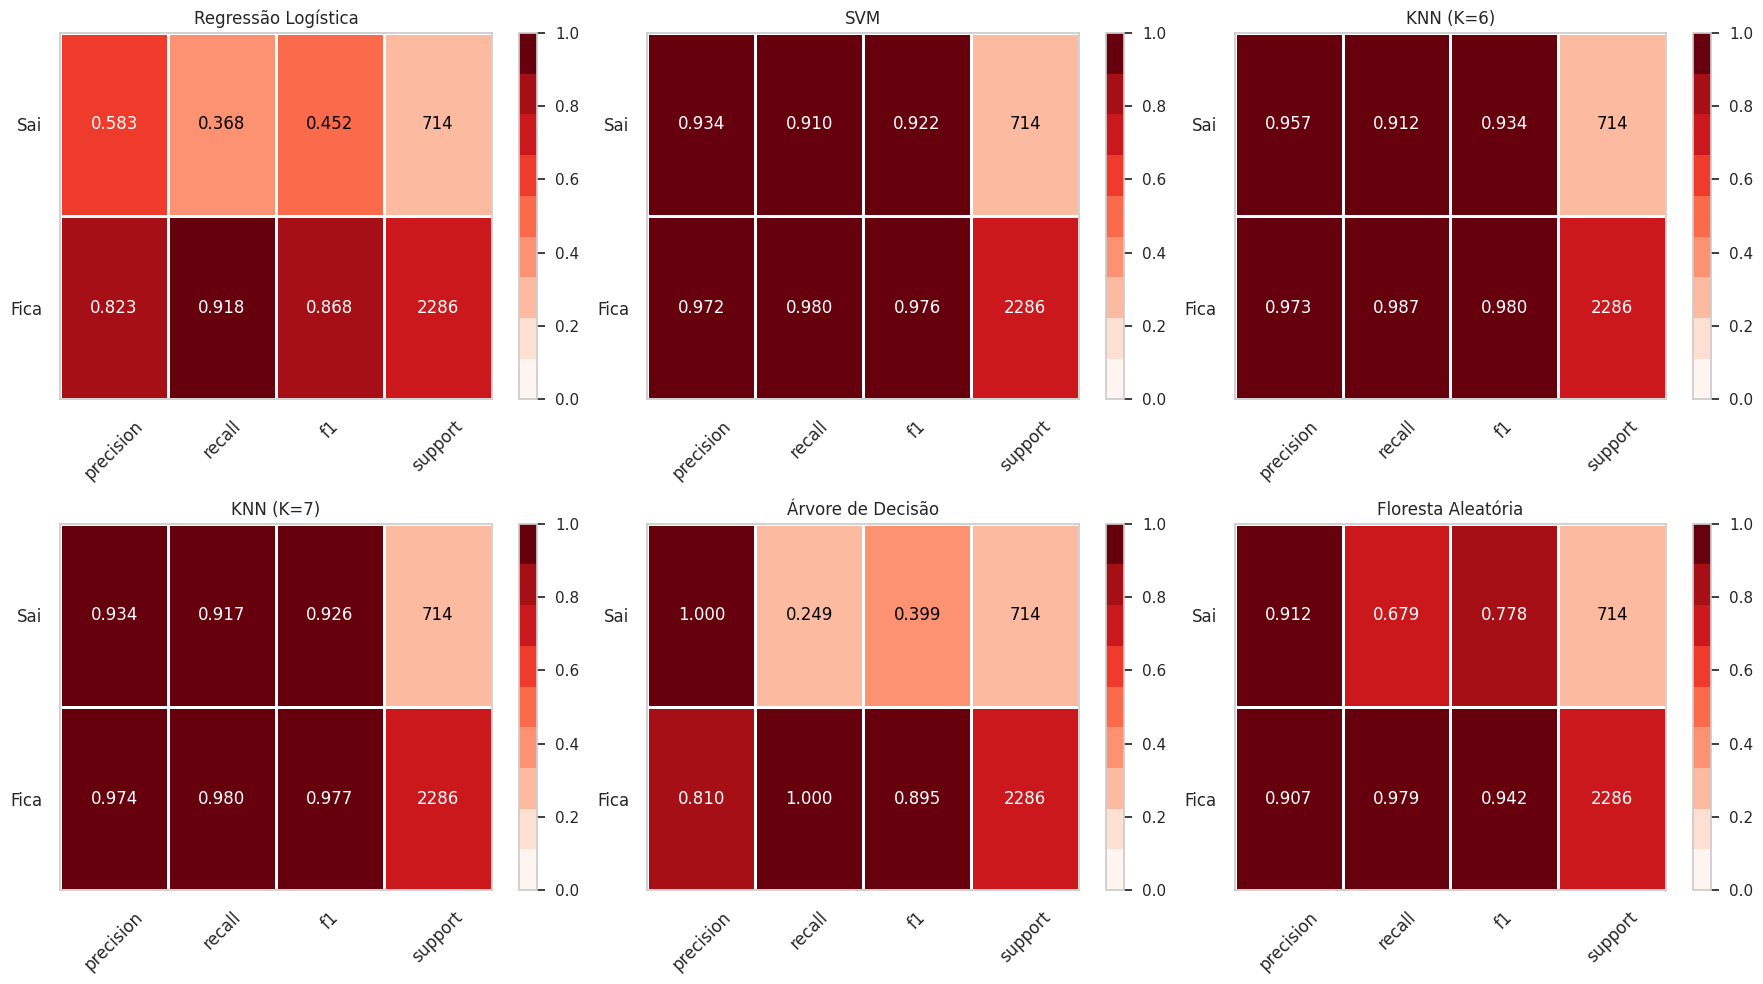

In [520]:
# Montar os relatórios de classificação e plotar em uma grade
from yellowbrick.classifier import ClassificationReport

def gerar_relatorio_visual(modelo, nome_modelo, X_avaliacao, y_avaliacao, ax):
    # Instancia o visualizador
    relatorio_classificacao = ClassificationReport(
        modelo,
        classes=class_names,
        support=True,
        cmap='Reds',
        ax=ax,
        title=nome_modelo
    )

    # Ajusta e renderiza o gráfico
    relatorio_classificacao.score(X_avaliacao, y_avaliacao)
    relatorio_classificacao.finalize()


fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=100)
axes = axes.flatten()

# Loop para plotar cada relatorio
for i, modelo in enumerate(modelos):
    # Para os modelos de árvores, utilizei os dados originais
    if "Árvore" in modelos_nomes[i] or "Floresta" in modelos_nomes[i]:
        X_avaliacao = X_test
    else:
        X_avaliacao = X_test_escalonado

    gerar_relatorio_visual(modelo, modelos_nomes[i], X_avaliacao, y_test, axes[i])

plt.tight_layout()
plt.show()

### Avaliando as métricas dos modelos

**SVM e KNN (K=7)**
- Estão equilibrados quase que perfeitamente e o SVM tem performance quase idêntica, no entanto, o KNN tem um recall mais alto para detectção de saídas, a diferença não é tão significativa, mas confirma o baixo número de falsos negativos que vimos na matriz de confusão (apenas 59). Sua acurácia de 96.50%, também é levemente superior a acurácia do SVM que é de 96.33%.

**Árvore de Decisão**
- Tem baixíssimo recall, apenas 25%, ou seja, o modelo não exerga 75% dos colaboradores que podem estar de saída, esse modelo falharia em avisar o RH preventivamente.
- Conforme vimos na matriz de confusão, a precisão do modelo para quem vai sair é de 100%. Sua acurácia é de 82.13%.

**Regressão Logística e Floresta Aleatória**
- Visualmente fica claro que a Regressão Logística é o pior modelo, o relatório tem as cores mais claras do mapa de calor.
- A Floresta Aleatória é melhor que a árvore simples, com um recal de aproximadamente 68% e com precisão alta de 91%. Aparenta ser um modelo sólido, mas ainda assim é inferir aos KNN e SVM. Sua acurácia é de 90.80%.

**KNN (K=6)**
- Analisando o relatório de classificação e a acurácia do modelo KNN com 6 vizinhos, ele é bem melhor do que KNN com 7 vizinhos, pois possuí acurária de 96.93% e um F1-Score de 93%.
- A decisão por não considerar esse modelo como superior a K=7 é pelo fato do problema do empate, um número par de vizinhos faz com que o modelo não consiga decidir se ser por meio de uma regra aleatória de escolha, o que pode representar incertezas nas escolhas. Já para o K=7, sempre averá

**<u>Econtramos nosso melhor modelo</u>**: **KNN (K=7)**, no entanto vamos continuar as avaliações para analisar as curvas ROC e de precisão recall

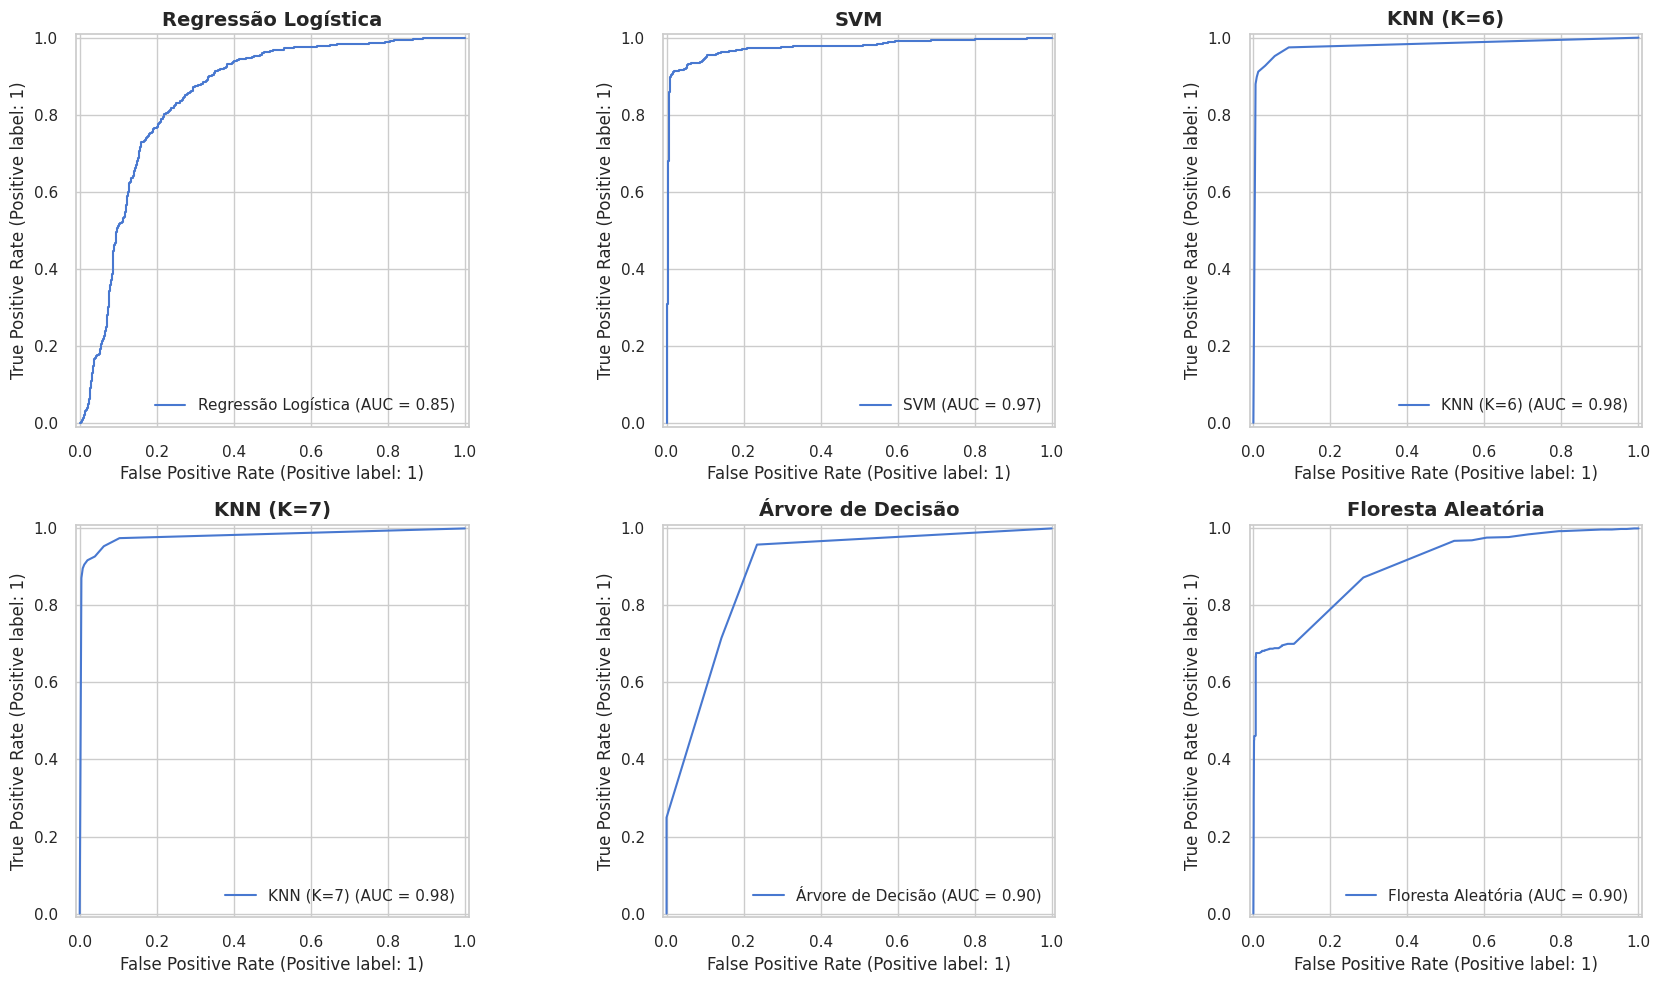

In [523]:
# plotar as curvas ROC dos modelos
from sklearn.metrics import RocCurveDisplay

fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=100)
axes = axes.flatten()

# Loop para plotar cada curva ROC
for i, modelo in enumerate(modelos):
    # Para os modelos de árvores, utilizei os dados originais
    if "Árvore" in modelos_nomes[i] or "Floresta" in modelos_nomes[i]:
        X_avaliacao = X_test
    else:
        X_avaliacao = X_test_escalonado

    # Usa RocCurveDisplay do scikit-learn
    RocCurveDisplay.from_estimator(
        modelo,
        X_avaliacao,
        y_test,
        ax=axes[i],
        name=modelos_nomes[i]
    )
    axes[i].set_title(f'{modelos_nomes[i]}', fontsize=14, fontweight='bold')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Avaliando as curvas ROC

Nenhuma novidade, os modelos SVM e KNNs cotinuam mostrando o melhor desempenho. As curvas estão mais próximas ao canto superior esquerdo indicando uma taxa de verdadeiros positivos bem alta.
  - **KNNs**: apresentam uma probabilidade de 98% de o modelo classificar corretamente um colaborador escolhido aleatoriamente entre as duas classes
  - **SVM**: apresenta uma probabilidade de 97%

#4. CONCLUSÃO
O modelo escolhido para apoiar o RH na detecção de evasão de funcionários, será o KNN (K=7). O modelo será capas de prever a saída de um funcionário e alertar o RH para a tomada de ações de retenção caso seja necessário.